In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Exploratory Data Analysis

In [2]:
df = pd.read_csv("/kaggle/input/edgeiiotset-cyber-security-dataset-of-iot-iiot/Edge-IIoTset dataset/Selected dataset for ML and DL/DNN-EdgeIIoT-dataset.csv")
df.head()

,frame.time,ip.src_host,ip.dst_host,arp.dst.proto_ipv4,arp.opcode,arp.hw.size,arp.src.proto_ipv4,icmp.checksum,icmp.seq_le,icmp.transmit_timestamp,...,mqtt.proto_len,mqtt.protoname,mqtt.topic,mqtt.topic_len,mqtt.ver,mbtcp.len,mbtcp.trans_id,mbtcp.unit_id,Attack_label,Attack_type
0,2021 11:44:10.081753000,192.168.0.128,192.168.0.101,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,Normal
1,2021 11:44:10.162218000,192.168.0.101,192.168.0.128,0,0.0,0.0,0,0.0,0.0,0.0,...,4.0,MQTT,0,0.0,4.0,0.0,0.0,0.0,0,Normal
2,2021 11:44:10.162271000,192.168.0.128,192.168.0.101,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,Normal
3,2021 11:44:10.162641000,192.168.0.128,192.168.0.101,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,Normal
4,2021 11:44:10.166132000,192.168.0.101,192.168.0.128,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0,Temperature_and_Humidity,24.0,0.0,0.0,0.0,0.0,0,Normal


In [3]:
df.columns

Index(['frame.time', 'ip.src_host', 'ip.dst_host', 'arp.dst.proto_ipv4',
       'arp.opcode', 'arp.hw.size', 'arp.src.proto_ipv4', 'icmp.checksum',
       'icmp.seq_le', 'icmp.transmit_timestamp', 'icmp.unused',
       'http.file_data', 'http.content_length', 'http.request.uri.query',
       'http.request.method', 'http.referer', 'http.request.full_uri',
       'http.request.version', 'http.response', 'http.tls_port', 'tcp.ack',
       'tcp.ack_raw', 'tcp.checksum', 'tcp.connection.fin',
       'tcp.connection.rst', 'tcp.connection.syn', 'tcp.connection.synack',
       'tcp.dstport', 'tcp.flags', 'tcp.flags.ack', 'tcp.len', 'tcp.options',
       'tcp.payload', 'tcp.seq', 'tcp.srcport', 'udp.port', 'udp.stream',
       'udp.time_delta', 'dns.qry.name', 'dns.qry.name.len', 'dns.qry.qu',
       'dns.qry.type', 'dns.retransmission', 'dns.retransmit_request',
       'dns.retransmit_request_in', 'mqtt.conack.flags',
       'mqtt.conflag.cleansess', 'mqtt.conflags', 'mqtt.hdrflags', 'mqtt.len

In [4]:
df.isna().sum()

frame.time            0
ip.src_host           0
ip.dst_host           0
arp.dst.proto_ipv4    0
arp.opcode            0
                     ..
mbtcp.len             0
mbtcp.trans_id        0
mbtcp.unit_id         0
Attack_label          0
Attack_type           0
Length: 63, dtype: int64

In [5]:
df["Attack_label"].value_counts()

Attack_label
0    1615643
1     603558
Name: count, dtype: int64

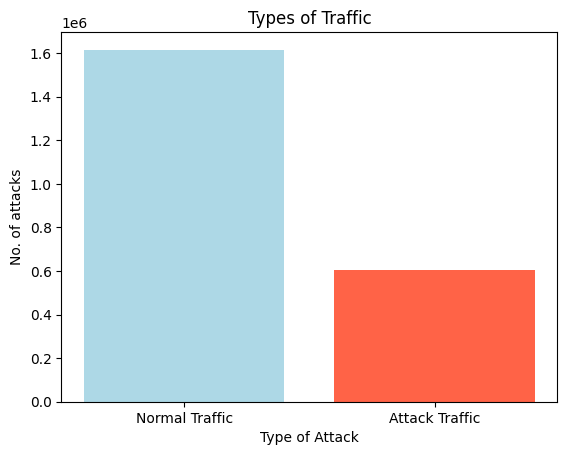

In [6]:
x = ["Normal Traffic", "Attack Traffic"]
y = [len(df[df["Attack_label"] == 0]), len(df[df["Attack_label"] == 1])]

plt.bar(x,y,color = ["lightblue","tomato"])
plt.title("Types of Traffic")
plt.xlabel("Type of Attack")
plt.ylabel("No. of attacks");

In [7]:
df[df["Attack_type"] != "Normal"]["Attack_type"].value_counts()

Attack_type
DDoS_UDP                 121568
DDoS_ICMP                116436
SQL_injection             51203
Password                  50153
Vulnerability_scanner     50110
DDoS_TCP                  50062
DDoS_HTTP                 49911
Uploading                 37634
Backdoor                  24862
Port_Scanning             22564
XSS                       15915
Ransomware                10925
MITM                       1214
Fingerprinting             1001
Name: count, dtype: int64

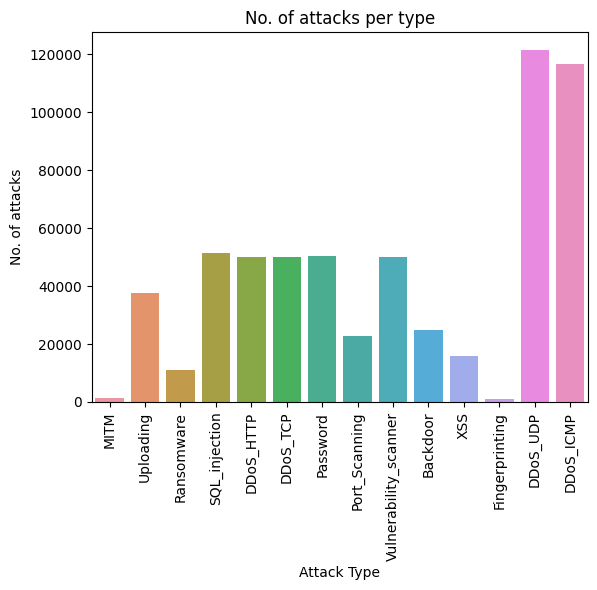

In [8]:
sns.countplot(x = df[df["Attack_type"] != "Normal"]["Attack_type"])
plt.xticks(rotation = 90);
plt.title("No. of attacks per type")
plt.xlabel("Attack Type")
plt.ylabel("No. of attacks");


### Data Preprocessing for binary classification

In [9]:
# Dataframe for binary classification
bin_df = df.drop("Attack_type",axis = 1)



In [10]:


drop_columns = ["frame.time", "ip.src_host", "ip.dst_host", "arp.src.proto_ipv4","arp.dst.proto_ipv4", 

         "http.file_data","http.request.full_uri","icmp.transmit_timestamp",

         "http.request.uri.query", "tcp.options","tcp.payload","tcp.srcport",

         "tcp.dstport", "udp.port", "mqtt.msg"]

bin_df.drop(drop_columns, axis=1, inplace=True)


In [11]:
len(bin_df.columns)

47

In [12]:
len(bin_df)

2219201

In [13]:
bin_df.drop_duplicates(subset = None, keep="first",inplace = True)

In [14]:
len(bin_df)

1925910

In [15]:
from sklearn.utils import shuffle
bin_df = shuffle(bin_df)

In [16]:
bin_df.head()

,arp.opcode,arp.hw.size,icmp.checksum,icmp.seq_le,icmp.unused,http.content_length,http.request.method,http.referer,http.request.version,http.response,...,mqtt.msgtype,mqtt.proto_len,mqtt.protoname,mqtt.topic,mqtt.topic_len,mqtt.ver,mbtcp.len,mbtcp.trans_id,mbtcp.unit_id,Attack_label
57943,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0
145352,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0
13468,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0
401969,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0
1010521,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0


In [17]:
bin_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1925910 entries, 57943 to 1100142
Data columns (total 47 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   arp.opcode                 float64
 1   arp.hw.size                float64
 2   icmp.checksum              float64
 3   icmp.seq_le                float64
 4   icmp.unused                float64
 5   http.content_length        float64
 6   http.request.method        object 
 7   http.referer               object 
 8   http.request.version       object 
 9   http.response              float64
 10  http.tls_port              float64
 11  tcp.ack                    float64
 12  tcp.ack_raw                float64
 13  tcp.checksum               float64
 14  tcp.connection.fin         float64
 15  tcp.connection.rst         float64
 16  tcp.connection.syn         float64
 17  tcp.connection.synack      float64
 18  tcp.flags                  float64
 19  tcp.flags.ack              float64
 20  tcp

In [18]:
pd.get_dummies(bin_df["http.request.method"])

,0.0,0,0.0,GET,OPTIONS,POST,PROPFIND,PUT,SEARCH,TRACE
57943,True,False,False,False,False,False,False,False,False,False
145352,True,False,False,False,False,False,False,False,False,False
13468,True,False,False,False,False,False,False,False,False,False
401969,True,False,False,False,False,False,False,False,False,False
1010521,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
643161,True,False,False,False,False,False,False,False,False,False
537323,True,False,False,False,False,False,False,False,False,False
1149617,True,False,False,False,False,False,False,False,False,False
153753,True,False,False,False,False,False,False,False,False,False


In [19]:
from sklearn.preprocessing import StandardScaler

from sklearn import preprocessing

def encode_text_dummy(df, name):

    dummies = pd.get_dummies(df[name], dtype=int)

    for x in dummies.columns:

        dummy_name = f"{name}-{x}"

        df[dummy_name] = dummies[x]

    df.drop(name, axis=1, inplace=True)

encode_text_dummy(bin_df,'http.request.method')

encode_text_dummy(bin_df,'http.referer')

encode_text_dummy(bin_df,"http.request.version")

encode_text_dummy(bin_df,"dns.qry.name.len")

encode_text_dummy(bin_df,"mqtt.conack.flags")

encode_text_dummy(bin_df,"mqtt.protoname")

encode_text_dummy(bin_df,"mqtt.topic")

In [20]:
bin_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1925910 entries, 57943 to 1100142
Data columns (total 96 columns):
 #   Column                                                                                                Dtype  
---  ------                                                                                                -----  
 0   arp.opcode                                                                                            float64
 1   arp.hw.size                                                                                           float64
 2   icmp.checksum                                                                                         float64
 3   icmp.seq_le                                                                                           float64
 4   icmp.unused                                                                                           float64
 5   http.content_length                                                           

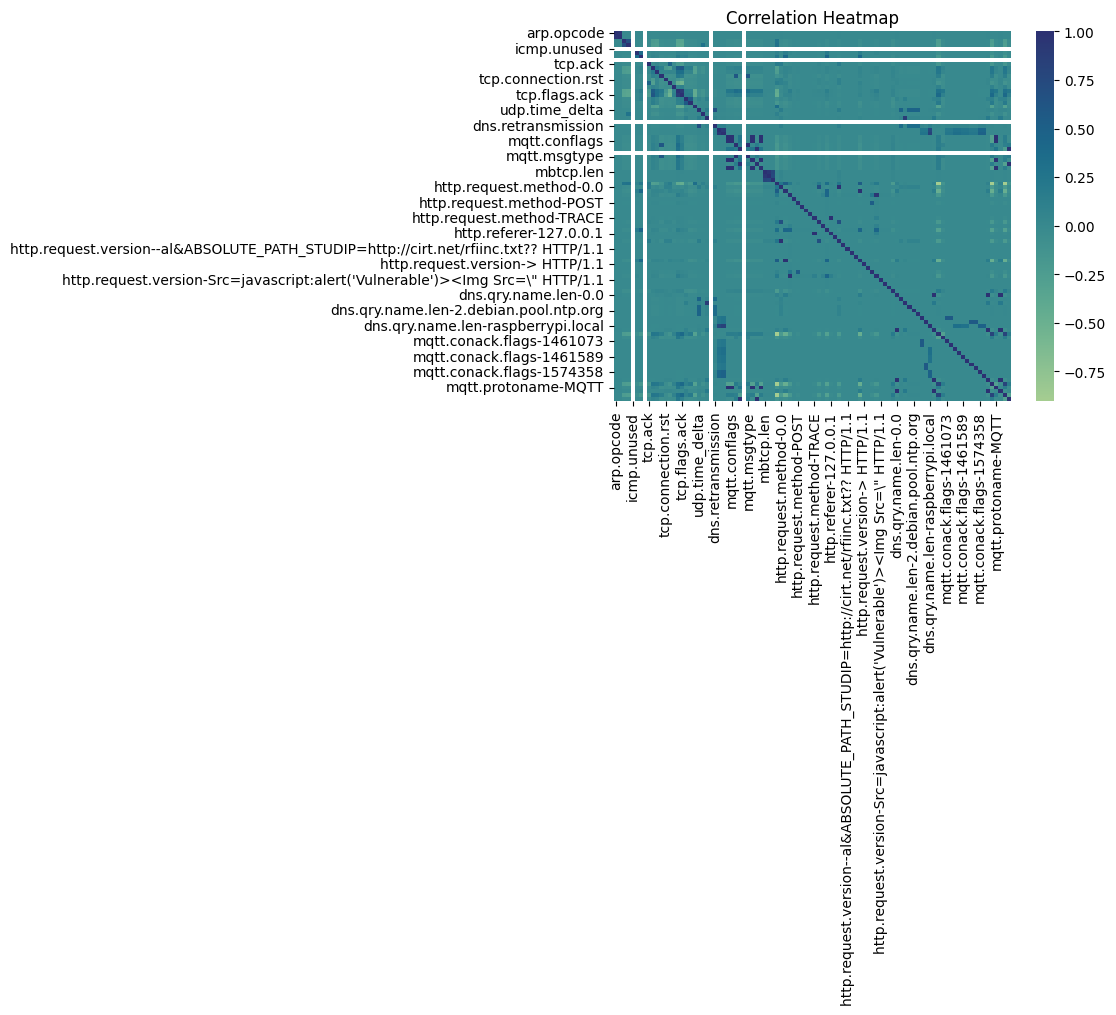

In [21]:

sns.heatmap(bin_df.corr(),cmap="crest")
plt.title('Correlation Heatmap')
plt.show()

In [22]:
bin_df.head()

,arp.opcode,arp.hw.size,icmp.checksum,icmp.seq_le,icmp.unused,http.content_length,http.response,http.tls_port,tcp.ack,tcp.ack_raw,...,mqtt.conack.flags-1471198,mqtt.conack.flags-1471199,mqtt.conack.flags-1574358,mqtt.conack.flags-1574359,mqtt.protoname-0.0,mqtt.protoname-0,mqtt.protoname-MQTT,mqtt.topic-0.0,mqtt.topic-0,mqtt.topic-Temperature_and_Humidity
57943,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.922085e+08,...,0,0,0,0,0,1,0,0,1,0
145352,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,9.511431e+07,...,0,0,0,0,0,1,0,0,1,0
13468,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,7.554674e+08,...,0,0,0,0,0,1,0,0,1,0
401969,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,59.0,1.124541e+09,...,0,0,0,0,0,1,0,0,1,0
1010521,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,3.849809e+09,...,0,0,0,0,0,1,0,0,1,0


In [23]:
x = bin_df.drop("Attack_label", axis = 1)
y = bin_df["Attack_label"]

In [24]:
x.head()

,arp.opcode,arp.hw.size,icmp.checksum,icmp.seq_le,icmp.unused,http.content_length,http.response,http.tls_port,tcp.ack,tcp.ack_raw,...,mqtt.conack.flags-1471198,mqtt.conack.flags-1471199,mqtt.conack.flags-1574358,mqtt.conack.flags-1574359,mqtt.protoname-0.0,mqtt.protoname-0,mqtt.protoname-MQTT,mqtt.topic-0.0,mqtt.topic-0,mqtt.topic-Temperature_and_Humidity
57943,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.922085e+08,...,0,0,0,0,0,1,0,0,1,0
145352,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,9.511431e+07,...,0,0,0,0,0,1,0,0,1,0
13468,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,7.554674e+08,...,0,0,0,0,0,1,0,0,1,0
401969,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,59.0,1.124541e+09,...,0,0,0,0,0,1,0,0,1,0
1010521,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,3.849809e+09,...,0,0,0,0,0,1,0,0,1,0


In [25]:
y.head()

57943      0
145352     0
13468      0
401969     0
1010521    0
Name: Attack_label, dtype: int64

### Splitting the dataset

In [26]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,shuffle = True,random_state = 42, stratify = y)

In [27]:
len(x_train),len(y_train),len(x_test),len(y_test)

(1348137, 1348137, 577773, 577773)

### Model Training

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV,StratifiedKFold

parameters = {'loss' : ('hinge', 'log_loss', 'modified_huber'),
              'penalty' : ('l2','l1','elasticnet'),
              'max_iter' : (10,50,100)
             }

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

clf = SGDClassifier()
sgd_model = GridSearchCV(clf,parameters,cv=cv,scoring="accuracy")

sgd_model.fit(x_train,y_train)


In [ ]:
sgd_model.best_params_

In [ ]:
y_preds = sgd_model.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_preds))

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_preds)

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix

cm = confusion_matrix(y_test,y_preds,labels = sgd_model.classes_)
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
plt.xticks(ticks=np.arange(2) + 0.5, labels=["Normal Traffic", "Attack Traffic"])
plt.yticks(ticks=np.arange(2) + 0.5, labels=["Normal Traffic", "Attack Traffic"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(sgd_model,x_test,y_test);
